In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
#%ls

## データの読み込み

In [48]:
spam_txt=pd.read_table('SMSSpamCollection',header=None)
spam_txt

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


## hamとspamを2値に変換する。

In [49]:
from sklearn.preprocessing import LabelEncoder

#ラベルエンコーダのインんスタンスを生成
class_le=LabelEncoder()
y=class_le.fit_transform(spam_txt[0])

### ハムが0 スパムが1

In [50]:
y

array([0, 0, 1, ..., 0, 0, 0])

## TF-IDFを使ってテキストデータを数値化

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count=CountVectorizer()
tfidf=TfidfTransformer(use_idf=True,norm='l2',smooth_idf=True)
X=tfidf.fit_transform(count.fit_transform(spam_txt.iloc[:,1])).toarray()

/Users/kobarijun/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [53]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## トレーニングデータとテストデータに分ける

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## ロジスティック回帰を使って回帰分析

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

lr=LogisticRegression(random_state=1)


#10分割交差検証でモデルを評価
scores=cross_val_score(estimator=lr,
                       X=X_train,
                       y=y_train,
                       cv=10,
                       n_jobs=-1)

print('CV accuracy: %f+/- %f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.957182+/- 0.010518


## グリッドサーチでパラメータ調整

In [62]:
from sklearn.grid_search import GridSearchCV


lr=LogisticRegression(random_state=1)


param_range=[10**c  for c in range(-3,3,1)]
param_grid=[{'C':param_range,'penalty':['l2']},
            {'C':param_range,'penalty':['l1']},
           ]

gs=GridSearchCV(estimator=lr,
                param_grid=param_grid,
                scoring='accuracy',
                cv=10,
               n_jobs=1)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}, {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1']}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [71]:
gs.best_params_

{'C': 100, 'penalty': 'l2'}

In [70]:
#10分割交差検証でモデルを評価
scores=cross_val_score(estimator=best_clf,
                       X=X_train,
                       y=y_train,
                       cv=10,
                       n_jobs=1)

print('CV accuracy: %f+/- %f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.978975+/- 0.004696


In [67]:
best_clf=gs.best_estimator_
best_clf.fit(X_train,y_train)
print('Test accuracy : %f' % best_clf.score(X_test,y_test))

Test accuracy : 0.983852


## 学習曲線

In [78]:
from sklearn.model_selection import learning_curve



train_sizes,train_scores,test_scores=\
                learning_curve(estimator=best_clf,
                              X=X_train,
                              y=y_train,
                              train_sizes=np.linspace(0.1,1.0,10),
                              cv=10,
                              n_jobs=1)
    
    
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)

test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)



/Users/kobarijun/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


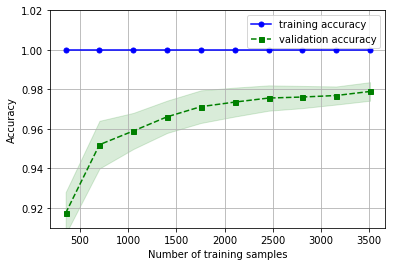

In [83]:
#プロット

#トレーニングデータ
plt.plot(train_sizes,train_mean,color='blue',marker='o',
                             markersize=5,label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean+train_std,
                 train_mean-train_std,
                 alpha=0.15,
                 color='blue')

#テストデータ
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',
                             markersize=5,label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean+test_std,
                 test_mean-test_std,
                 alpha=0.15,
                 color='green')


plt.grid()

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')

plt.legend(loc='best')
plt.ylim([0.91,1.02])

plt.show()

<br>過学習の傾向が見られる</br>